### Problem Description

We need to preform EDA on Sales dataset and extract useful information

## Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


## EDA

In [4]:
missing_percentage = df.isnull().sum()/df.shape[0] * 100 ## Write your code here
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
df.dropna(subset=['CustomerID'],inplace=True) ## Write your code here

In [6]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

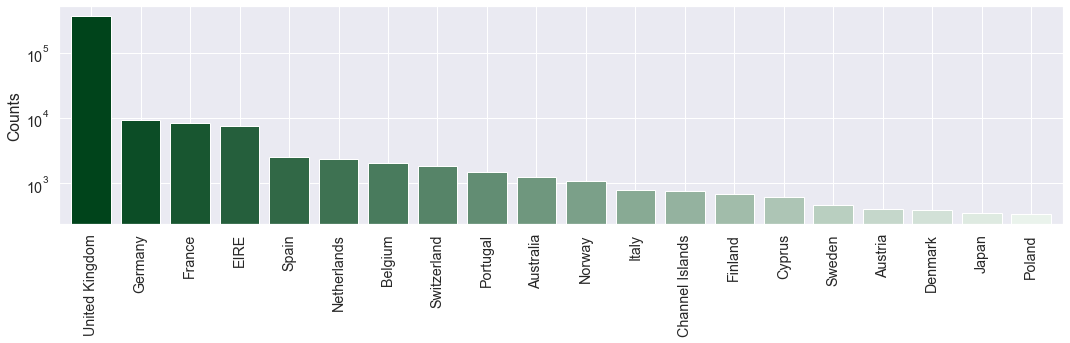

In [7]:
plt.figure(figsize = (18, 4))
plt.yscale("log")

df.Country.value_counts()[:20].plot(kind='bar', ylabel='Counts',color =sns.light_palette("#00441b",20,reverse=True),
        width = 0.8)


plt.show()

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [8]:
df['Revenue'] = df['UnitPrice'] * df['Quantity'] ## Write your code here
df_total_rev = df.groupby(['CustomerID'])['Revenue'].sum().reset_index()
df_top_10 = df_total_rev.sort_values(by='Revenue', ascending=False,ignore_index = True)[:10] ## Write your code here
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [9]:
freq=df['CustomerID'].value_counts()[:5]
df_top_cust = pd.DataFrame({'CustomerID': freq.keys(), 'Frequency': freq.values}) ## Write your code here
df_top_cust

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [10]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

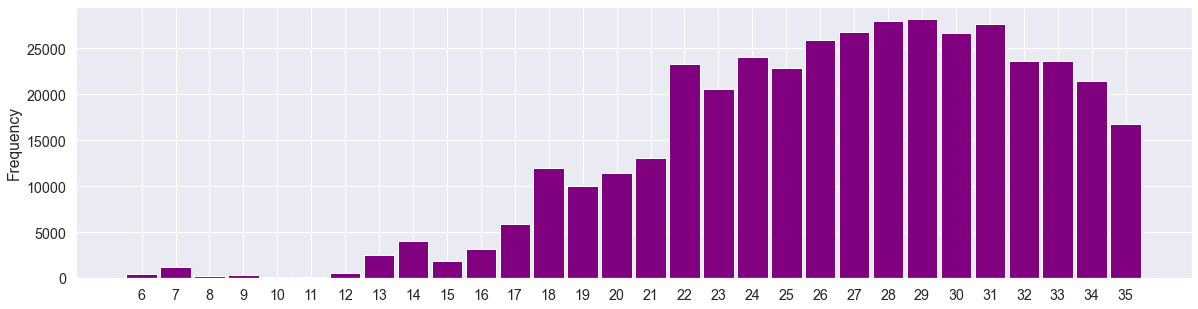

In [11]:
plt.xticks(np.arange(6, 36, 1))
df['Description'].str.len().plot(kind='hist',bins=30,range=(6, 36),rwidth=.9,align='left',color='purple',figsize = (20, 5))
plt.show() #Write your Code here

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [12]:
df["Year"] = df['InvoiceDate'].dt.year ## Write your code here
df["Quarter"] = df['InvoiceDate'].dt.quarter ## Write your code here
df["Month"] = df['InvoiceDate'].dt.month ## Write your code here
df["Week"] = df['InvoiceDate'].dt.week ## Write your code here
df["Weekday"] = df['InvoiceDate'].dt.weekday ## Write your code here
df["Day"] = df['InvoiceDate'].dt.day ## Write your code here
df["Dayofyear"] = df['InvoiceDate'].dt.dayofyear ## Write your code here
df["Date"] = df['InvoiceDate'].dt.date ## Write your code here

C:\Users\ZEYADA~1\AppData\Local\Temp/ipykernel_6188/3805275541.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df['InvoiceDate'].dt.week ## Write your code here


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,2010,1,1,2,1,12,12,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010,1,1,2,1,12,12,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,2010,1,1,2,1,12,12,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010,1,1,2,1,12,12,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010,1,1,2,1,12,12,2010-01-12


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [14]:
grouped_features = ["Date","Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

In [15]:
agg_data=pd.DataFrame()
agg_data["Quantity"] = df.groupby(grouped_features).Quantity.sum()
agg_data["Revenue"] = df.groupby(grouped_features).Revenue.sum()
agg_data = agg_data.reset_index()
agg_data.head() ## Write your code here

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-01-12,2010,1,1,2,1,12,12,10002,60,51.00
1,2010-01-12,2010,1,1,2,1,12,12,10125,2,1.70
2,2010-01-12,2010,1,1,2,1,12,12,10133,5,4.25
3,2010-01-12,2010,1,1,2,1,12,12,15044B,1,2.95
4,2010-01-12,2010,1,1,2,1,12,12,15056BL,20,113.00


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook